## K-Means Clustering Experiment

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
    

### Importing Data

In [3]:

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target
    

We start 

In [10]:

# Implementing k-means algorithm
def k_means(X, k, initial_centroids=None, max_iter=100):
    if initial_centroids is None:
        indices = np.random.choice(X.shape[0], k, replace=False)
        centroids = X[indices]
    else:
        centroids = initial_centroids

    for _ in range(max_iter):
        # Assign clusters
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_cluster = np.argmin(distances, axis=0) 

        # Update centroids
        new_centroids = np.array([X[closest_cluster == k].mean(axis=0) for k in range(centroids.shape[0])])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, closest_cluster
    

### Load Data

In [11]:

# Function to run the experiment with different k and initial centroids
def run_experiment(X, ks, initial_methods):
    results = {}
    for k in ks:
        results[k] = {}
        for method in initial_methods:
            if method == "random":
                centroids = None
            elif method == "first_k":
                centroids = X[:k]
            elif method == "k_hierarchical":
                # Placeholder for hierarchical method to generate initial centroids
                from scipy.cluster.hierarchy import linkage, fcluster
                Z = linkage(X, 'ward')
                initial_clusters = fcluster(Z, k, criterion='maxclust')
                centroids = np.array([X[initial_clusters == i+1].mean(axis=0) for i in range(k)])
            
            final_centroids, clusters = k_means(X, k, initial_centroids=centroids)
            score = silhouette_score(X, clusters)
            results[k][method] = (final_centroids, clusters, score)
    return results
    

Load the Iris dataset to apply K-Means clustering.

In [17]:

# Settings for the experiment
ks = [2, 3, 5]
initial_methods = ["random", "first_k", "k_hierarchical"]
results = run_experiment(X, ks, initial_methods)
results
    

{2: {'random': (array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
          [6.30103093, 2.88659794, 4.95876289, 1.69587629]]),
   array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
   0.6810461692117462),
  'first_k': (array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
          [5.00566038, 3.36981132, 1.56037736, 0.29056604]]),
   array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1,

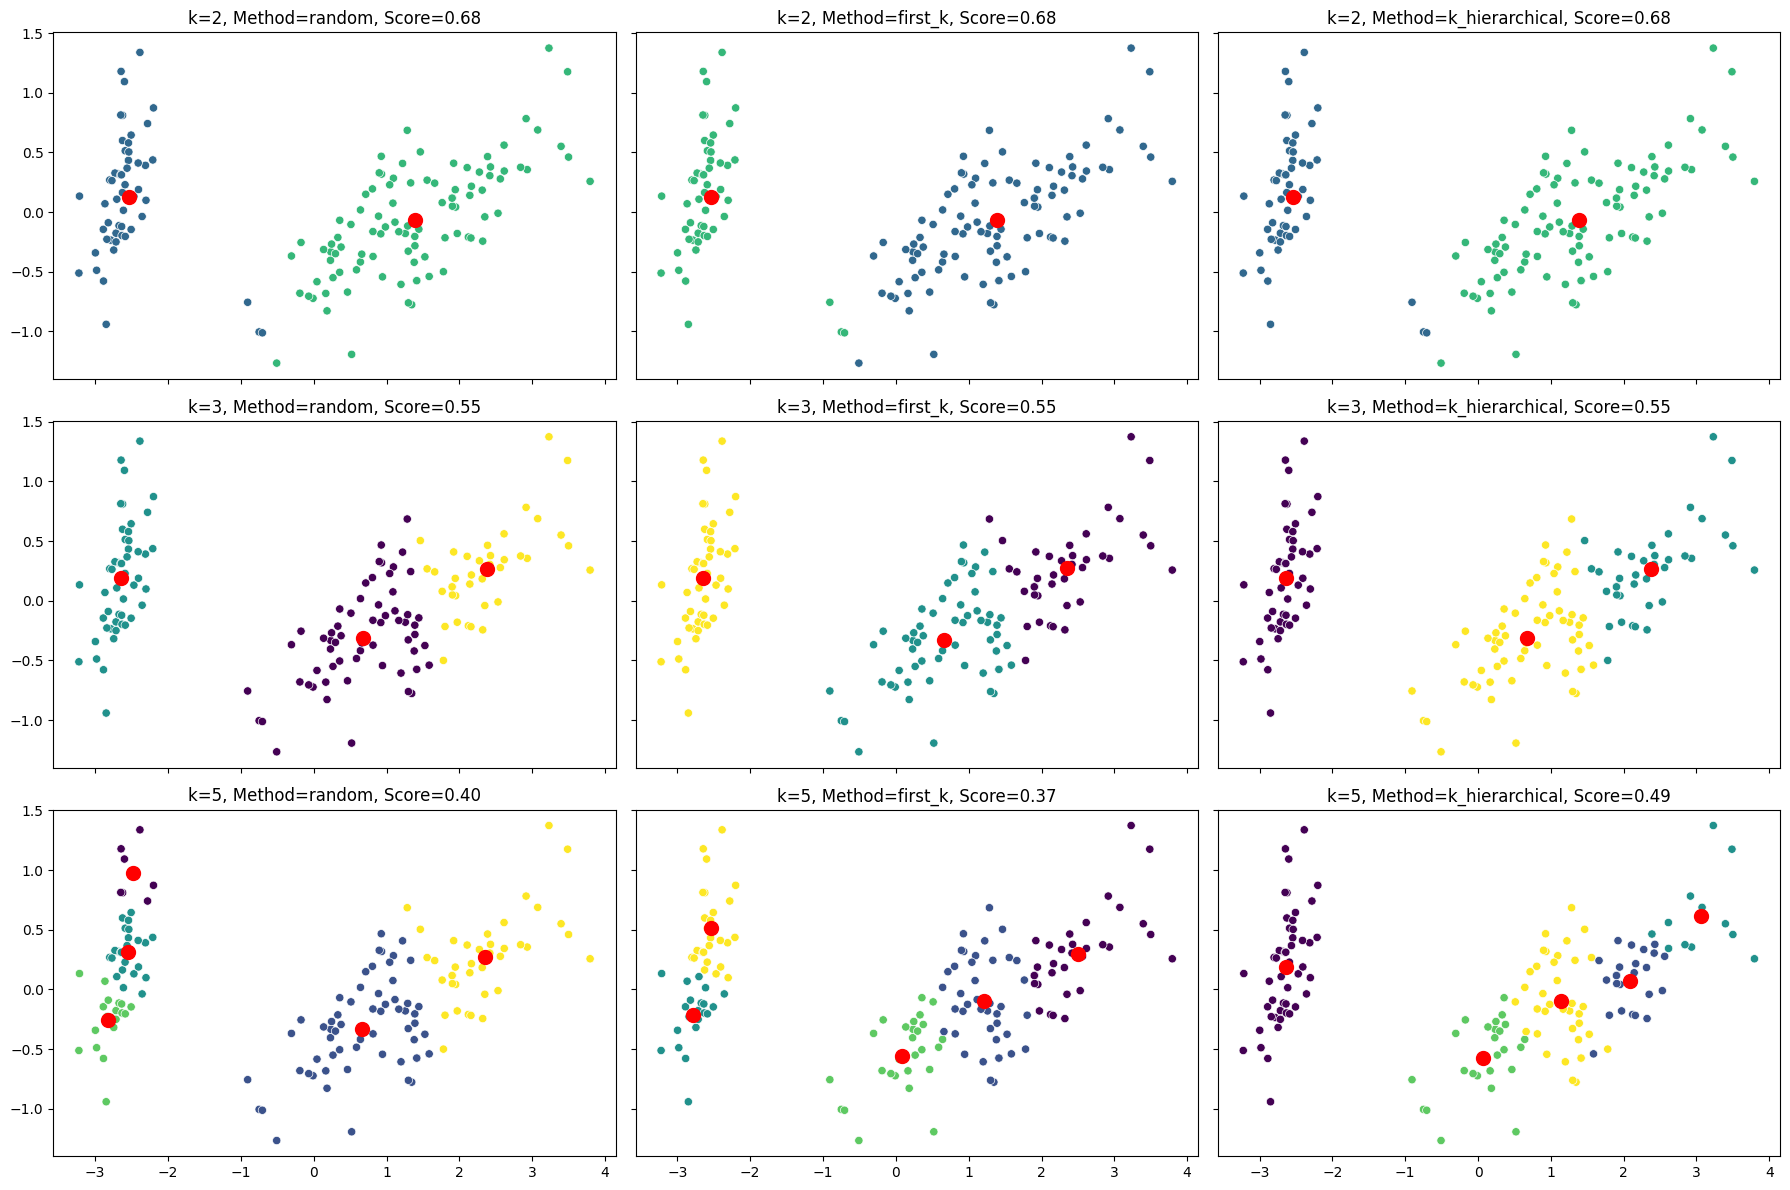

In [19]:

# Importing necessary libraries for visualization
import seaborn as sns
from sklearn.decomposition import PCA

# Visualizing the clustering results using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Setting up the plot for each k value with its methods
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Plotting each result
for i, k in enumerate(ks):
    for j, method in enumerate(initial_methods):
        centroids, clusters, score = results[k][method]
        ax = axes[i * 3 + j]
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', ax=ax, legend=None)
        centroid_pca = pca.transform(centroids)
        ax.scatter(centroid_pca[:, 0], centroid_pca[:, 1], s=100, c='red', label='Centroids')
        ax.set_title(f'k={k}, Method={method}, Score={score:.2f}')
        ax.label_outer()

plt.tight_layout()
plt.show()
